# Proyek Analisis Data: [Ecommerce Public Dataset]
- **Nama:** [Nasywa Anindya Putri]
- **Email:** [nasywaanindya03@gmail.com]
- **ID Dicoding:** [nasywaanindya]

## Menentukan Pertanyaan Bisnis

- Berdasarkan data jumlah penjual di setiap kota, apa saja 10 kota teratas dengan jumlah penjual terbanyak?
- Apa kategori produk yang paling populer?
- Apa jenis pembayaran yang paling banyak digunakan dan berapa total uang yang dibayarkan menggunakan jenis pembayaran tersebut?

## Import Semua Packages/Library yang Digunakan

In [1]:
import io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Data Wrangling

### Gathering Data

In [6]:
df_sellers = pd.read_csv('data\sellers_dataset.csv')

In [8]:
df_products = pd.read_csv('data\products_dataset.csv')

In [9]:
df_payments = pd.read_csv('data\order_payments_dataset.csv')


### Assessing Data

Detail informasi data

In [10]:
df_sellers.info()
df_products.info()
df_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g   

Mengidentifikasi Missing Value

In [11]:
#identifikasi missing value data sellers
df_sellers.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [12]:
#identifikasi missing value data products
df_products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [13]:
#identifikasi missing value data order payment
df_payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Memeriksa Duplikasi Data


In [14]:
#duplikasi data seller
df_sellers.duplicated().sum()


0

In [15]:
#duplikasi data product
df_products.duplicated().sum()


0

In [16]:
#duplikasi data payment
df_payments.duplicated().sum()

0

Memeriksa Value yang tidak sesuai

In [17]:
#memeriksa.unique
df_sellers['seller_city'].unique()

array(['campinas', 'mogi guacu', 'rio de janeiro', 'sao paulo',
       'braganca paulista', 'brejao', 'penapolis', 'curitiba', 'anapolis',
       'itirapina', 'tubarao', 'lauro de freitas', 'imbituba', 'brasilia',
       'porto seguro', 'guaruja', 'tabatinga', 'salto', 'tres de maio',
       'belo horizonte', 'arapongas', 'sao bernardo do campo', 'tatui',
       'garopaba', 'camanducaia', 'tupa', 'guarulhos',
       'sao jose dos pinhais', 'sao ludgero', 'sao jose', 'piracicaba',
       'porto alegre', 'congonhal', 'santo andre', 'osasco', 'valinhos',
       'joinville', 'saquarema', 'barra velha', 'petropolis',
       'santo antonio da patrulha', 'ponta grossa', 'santana de parnaiba',
       'sao carlos', 'ibitinga', 'barueri', 'caxias do sul', 'araguari',
       'contagem', 'jaragua do sul', 'lages - sc', 'bento goncalves',
       'catanduva', 'ribeirao pires', 'jaboticabal', 'echapora', 'cotia',
       'rio do sul', 'sorocaba', 'pradopolis', 'itaborai', 'mirassol',
       'birigui',

### Cleaning Data

In [18]:
#Menghapus Missing Value data products
df_products.dropna(axis=0, inplace=True)

In [19]:
#mengecek kembali Missing Value yang sudah dihapus
df_products.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [24]:
# Menghapus baris yang mengandung nilai 'vendas@creditparts.com.br' dan '04482255'
df_sellers = df_sellers[~df_sellers['seller_city'].isin(['vendas@creditparts.com.br', '04482255',])]

# Mengganti nama kota yang tidak sesuai dengan nama yang benar
df_sellers['seller_city'] = df_sellers['seller_city'].str.strip()  # Menghapus spasi di awal dan akhir
df_sellers = df_sellers[~df_sellers['seller_city'].str.contains('-')] # menghapus data yang ada tanda -
# Daftar penggantian nama kota yang tidak sesuai dengan nama yang benar
corrections = {
    'sao paluo': 'sao paulo',
    'sao pauo': 'sao paulo',
    'são paulo': 'sao paulo',
    's paulo': 'sao paulo',
    'sao  jose dos pinhais': 'sao jose dos pinhais',
    'sao jose dos pinhas': 'sao jose dos pinhais',
    'sao jose do rio pret': 'sao jose do rio preto',
    'rio de janeiro \\rio de janeiro': 'rio de janeiro',
    'floranopolis': 'florianopolis',
    'ribeirao pretp': 'ribeirao preto',
    'rio de janeiro, rio de janeiro, brasil': 'rio de janeiro',
    'riberao preto': 'ribeirao preto',
    'sao paulop': 'sao paulo',
    'rio de janeiro / rio de janeiro': 'rio de janeiro',
    'sao bernardo do capo': 'sao bernardo do campo',
    'santo andre/sao paulo': 'santo andre',
    's jose do rio preto': 'sao jose do rio preto',
    'santo antonio da patrulha': 'santo antonio',
    'santo andre/sao paulo': 'santo andre',
    's bernardo do campo': 'sao bernardo do campo',
    's jose do rio pardo': 'sao jose do rio pardo',
    's jose dos campos': 'sao jose dos campos',
    'campo limpo paulista': 'campo limpo',
    'sao goncalo': 'sao goncalo',
    'sao goncalo do amarante': 'sao goncalo',
    'sao mateus do sul': 'sao mateus',
    'campo mourao': 'campo mourao',
    'sao joao da boa vista': 'sao joao da boa vista',
    's jose dos pinhais': 'sao jose dos pinhais',
    'sao caetano do sul': 'sao caetano do sul',
    'sao sebastiao': 'sao sebastiao',
    'sao vicente': 'sao vicente',
    'sao jose': 'sao jose',
    'sao jose do rio preto': 'sao jose do rio preto',
    'sao jose dos campos': 'sao jose dos campos',
    'sao jose dos pinhais': 'sao jose dos pinhais',
    'sao jose do rio pardo': 'sao jose do rio pardo',
    'sao bernardo do campo': 'sao bernardo do campo',
    'sao bernardo do campo': 'sao bernardo do campo',
    'sao paulo / sao paulo': 'sao paulo',
    'santo antonio': 'santo antonio',
    'santo andre': 'santo andre',
    'sao joao del rei': 'sao joao del rei',
    'santo angelo': 'santo angelo',
    'sao joaquim da barra': 'sao joaquim da barra',
    'sao francisco do sul': 'sao francisco do sul',
    'sao miguel do oeste': 'sao miguel do oeste',
    'sao miguel d oeste': 'sao miguel do oeste',
    'sao miguel d\'oeste': 'sao miguel do oeste',
    'sao miguel d\'oeste': 'sao miguel do oeste',
    'sao  jose dos pinhais': 'sao jose dos pinhais',
    'sao jose dos pinhas': 'sao jose dos pinhais',
    'sao jose do rio pret': 'sao jose do rio preto',
    'sao pedro da aldeia': 'sao pedro da aldeia',
    'sao paulo/sp': 'sao paulo',
    'sao paulo / sao paulo': 'sao paulo',
    'sao paulo sp': 'sao paulo',
    'sao paulo / sao paulo': 'sao paulo',
    'sao paulo/sao paulo': 'sao paulo',
    'sao pedro': 'sao pedro',
    'sao sebastiao da grama/sp': 'sao sebastiao da grama',
    'sao  jose do rio pardo': 'sao jose do rio pardo',
    'sao vicente': 'sao vicente',
    'santo andre/sao paulo': 'santo andre',
    'santo angelo': 'santo angelo',
    'santo antonio': 'santo antonio',
    'santo antonio da patrulha': 'santo antonio',
    'santo antonio de posse': 'santo antonio de posse',
    'sao bernardo do capo': 'sao bernardo do campo',
    'sao goncalo': 'sao goncalo',
    'sao goncalo do amarante': 'sao goncalo',
    'sao jose': 'sao jose',
    'sao jose da bela vista': 'sao jose da bela vista',
    'sao jose da coroa grande': 'sao jose da coroa grande',
    'sao jose da lapa': 'sao jose da lapa',
    'sao jose da safira': 'sao jose da safira',
    'sao jose das missões': 'sao jose das missoes',
    'sao jose das palmeiras': 'sao jose das palmeiras',
    'sao jose das trs ilhas': 'sao jose das tres ilhas',
}



# Melakukan penggantian nama kota yang tidak sesuai dengan nama yang benar
df_sellers['seller_city'].replace(corrections, inplace=True)


In [25]:
#cek kembali
df_sellers['seller_city'].unique()

array(['campinas', 'mogi guacu', 'rio de janeiro', 'sao paulo',
       'braganca paulista', 'brejao', 'penapolis', 'curitiba', 'anapolis',
       'itirapina', 'tubarao', 'lauro de freitas', 'imbituba', 'brasilia',
       'porto seguro', 'guaruja', 'tabatinga', 'salto', 'tres de maio',
       'belo horizonte', 'arapongas', 'sao bernardo do campo', 'tatui',
       'garopaba', 'camanducaia', 'tupa', 'guarulhos',
       'sao jose dos pinhais', 'sao ludgero', 'sao jose', 'piracicaba',
       'porto alegre', 'congonhal', 'santo andre', 'osasco', 'valinhos',
       'joinville', 'saquarema', 'barra velha', 'petropolis',
       'santo antonio', 'ponta grossa', 'santana de parnaiba',
       'sao carlos', 'ibitinga', 'barueri', 'caxias do sul', 'araguari',
       'contagem', 'jaragua do sul', 'bento goncalves', 'catanduva',
       'ribeirao pires', 'jaboticabal', 'echapora', 'cotia', 'rio do sul',
       'sorocaba', 'pradopolis', 'itaborai', 'mirassol', 'birigui',
       'assis', 'jaguariuna', 'a

In [26]:
#menghapus _ dalam kolom product_category_name
df_products['product_category_name'] = df_products['product_category_name'].str.replace('_', ' ')

# Cetak hasil setelah mengganti karakter "_"
df_products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao ferramentas iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama mesa banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


## Exploratory Data Analysis (EDA)

### Explore Seller

In [27]:
df_sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [28]:
#Menghitung jumlah seller di setiap kota
total_seller = df_sellers['seller_city'].value_counts
total_seller()

seller_city
sao paulo         699
curitiba          127
rio de janeiro     99
belo horizonte     68
ribeirao preto     54
                 ... 
lagoa santa         1
orleans             1
guarapuava          1
sinop               1
leme                1
Name: count, Length: 588, dtype: int64

In [29]:
#Menghitung jumlah seller di setiap negara
total_seller_state = df_sellers['seller_state'].value_counts
total_seller_state()

seller_state
SP    1846
PR     347
MG     244
SC     189
RJ     170
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
RN       5
MS       5
MT       4
RO       2
SE       2
PI       1
AC       1
MA       1
AM       1
PA       1
Name: count, dtype: int64

In [30]:
# Melakukan pengelompokan berdasarkan negara dan kota, dan menghitung jumlah penjual

city_sellers_count = df_sellers.groupby(['seller_state', 'seller_city']).size().reset_index(name='Total_Seller')

city_sellers_count_sorted = city_sellers_count.sort_values(by='Total_Seller', ascending=False)

city_sellers_count_sorted

,seller_state,seller_city,Total_Seller
572,SP,sao paulo,699
165,PR,curitiba,124
233,RJ,rio de janeiro,96
57,MG,belo horizonte,66
544,SP,ribeirao preto,54
...,...,...,...
240,RJ,tres rios,1
238,RJ,saquarema,1
237,RJ,sao pedro da aldeia,1
234,RJ,santo antonio de padua,1


### Explore Product

In [31]:
df_products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao ferramentas iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama mesa banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [32]:
df_products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000
mean,48.476592,771.492393,2.188961,2276.956586,30.854545,16.958813,23.208596
std,10.245699,635.124831,1.736787,4279.291845,16.955965,13.636115,12.078762
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


<Figure size 1500x1000 with 0 Axes>

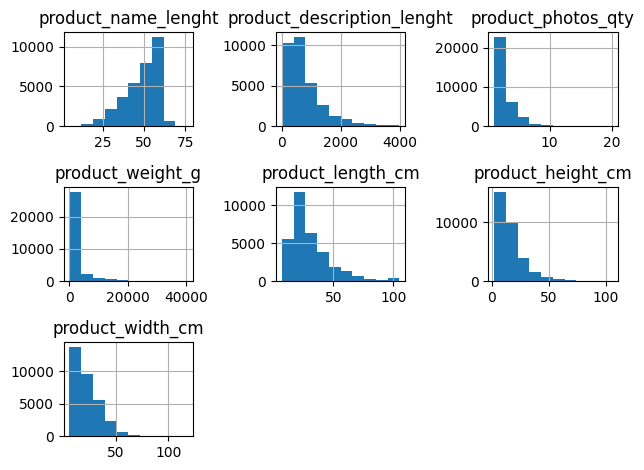

In [33]:
plt.figure(figsize=(15, 10))
df_products.hist()
plt.tight_layout()
plt.show()

In [34]:
total_product_category = df_products['product_category_name'].value_counts()
total_product_category

product_category_name
cama mesa banho                  3029
esporte lazer                    2867
moveis decoracao                 2657
beleza saude                     2444
utilidades domesticas            2335
                                 ... 
fashion roupa infanto juvenil       5
casa conforto 2                     5
pc gamer                            3
seguros e servicos                  2
cds dvds musicais                   1
Name: count, Length: 73, dtype: int64

In [35]:
df_products['product_category_name'].unique()

array(['perfumaria', 'artes', 'esporte lazer', 'bebes',
       'utilidades domesticas', 'instrumentos musicais', 'cool stuff',
       'moveis decoracao', 'eletrodomesticos', 'brinquedos',
       'cama mesa banho', 'construcao ferramentas seguranca',
       'informatica acessorios', 'beleza saude', 'malas acessorios',
       'ferramentas jardim', 'moveis escritorio', 'automotivo',
       'eletronicos', 'fashion calcados', 'telefonia', 'papelaria',
       'fashion bolsas e acessorios', 'pcs', 'casa construcao',
       'relogios presentes', 'construcao ferramentas construcao',
       'pet shop', 'eletroportateis', 'agro industria e comercio',
       'moveis sala', 'sinalizacao e seguranca', 'climatizacao',
       'consoles games', 'livros interesse geral',
       'construcao ferramentas ferramentas',
       'fashion underwear e moda praia', 'fashion roupa masculina',
       'moveis cozinha area de servico jantar e jardim',
       'industria comercio e negocios', 'telefonia fixa',
       '

### Explore Order Payment

In [36]:
df_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [37]:
grouped_data = df_payments.groupby("payment_type")["payment_value"].sum().reset_index()
grouped_data = grouped_data.sort_values(by="payment_value", ascending=False)

grouped_data

,payment_type,payment_value
1,credit_card,12542084.19
0,boleto,2869361.27
4,voucher,379436.87
2,debit_card,217989.79
3,not_defined,0.00


## Visualization & Explanatory Analysis

### Pertanyaan 1 : Berdasarkan data jumlah penjual di setiap kota, apa saja 10 kota teratas dengan jumlah penjual terbanyak?


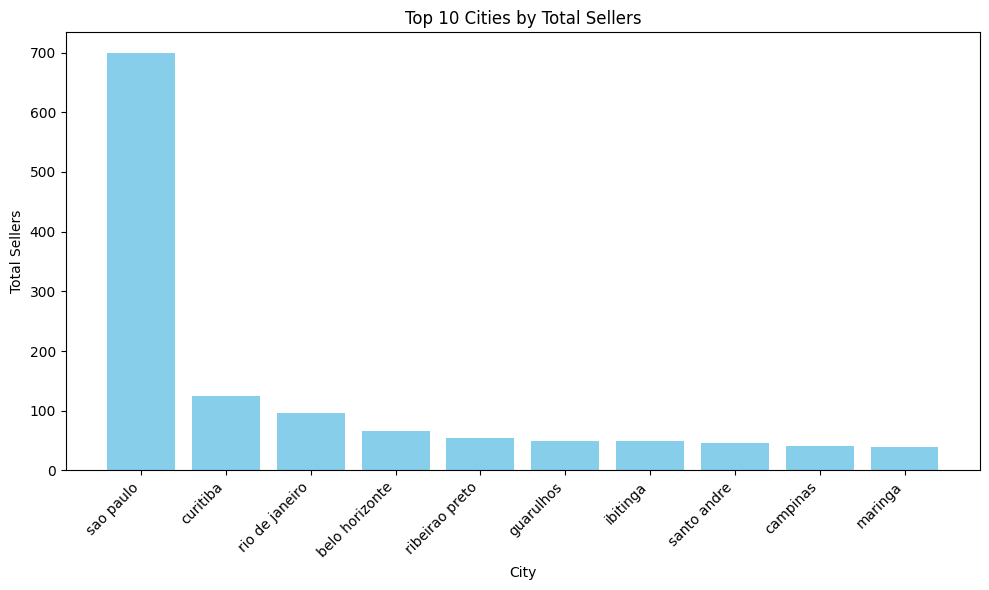

In [38]:
# Mengambil 10 data teratas
top_10_cities = city_sellers_count_sorted.head(10)

# Membuat bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_cities['seller_city'], top_10_cities['Total_Seller'], color='skyblue')
plt.xlabel('City')
plt.ylabel('Total Sellers')
plt.title('Top 10 Cities by Total Sellers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Pertanyaan 2 : Apa kategori produk yang paling populer?

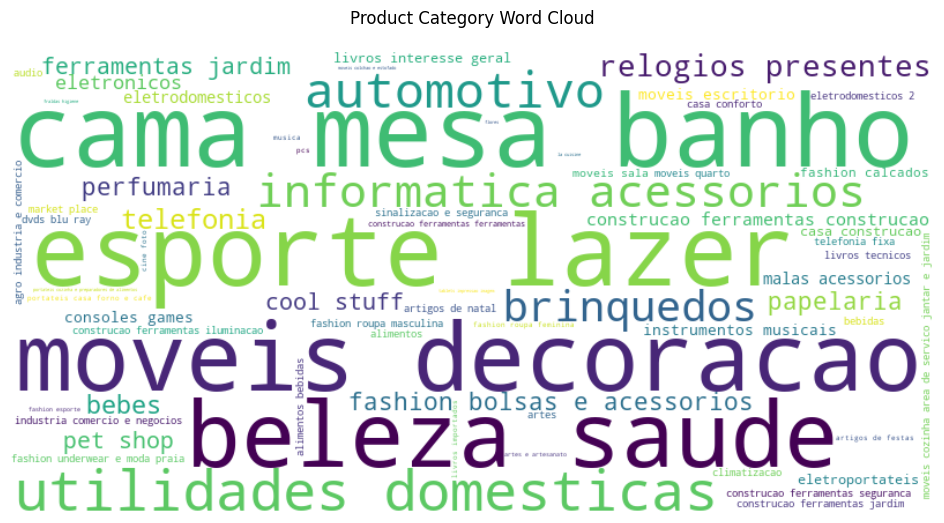

In [39]:
from wordcloud import WordCloud

# Membuat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(total_product_category)

# Membuat Plotting WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Product Category Word Cloud', pad=20)
plt.axis('off')
plt.show()


### Pertanyaan 3 : Apa jenis pembayaran yang paling banyak digunakan dan berapa total uang yang dibayarkan menggunakan jenis pembayaran tersebut?

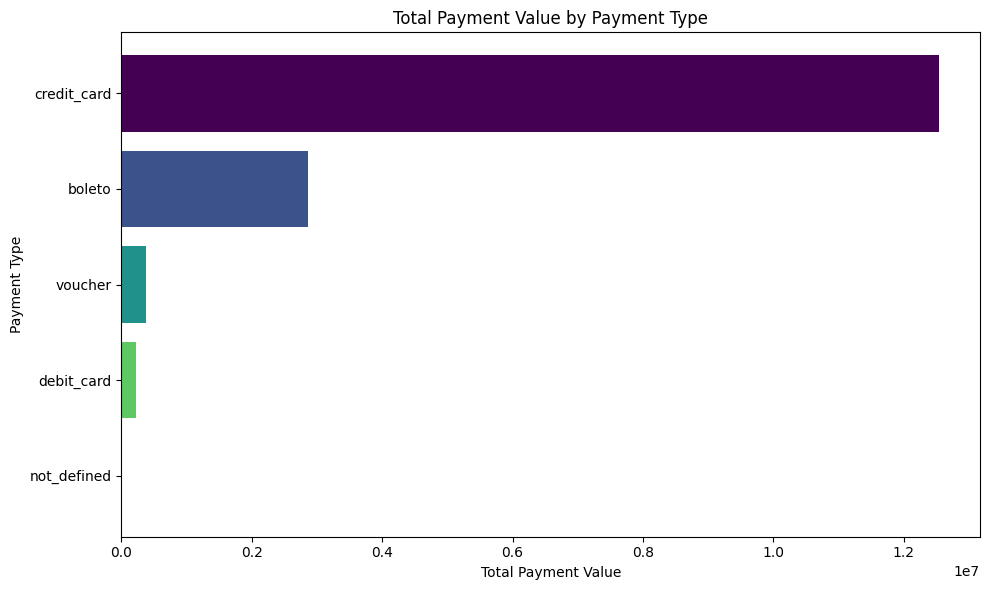

In [40]:
# Membuat colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(grouped_data)))

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(grouped_data['payment_type'], grouped_data['payment_value'], color=colors)
plt.xlabel('Total Payment Value')
plt.ylabel('Payment Type')
plt.title('Total Payment Value by Payment Type')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

# Conclusion

1. Ada sepuluh kota asal yang memiliki jumlah penjual terbanyak, diantaranya adalah sao paulo, curitiba, rio de janeiro, belo horizonte, rebeirao perto,guarulhos, ibitinga, santo andre, campinas, dan maringa. Sao Paulo adalah kota yang berada di negara SP. Kota saou paulo memiliki jumlah penjual sebanyak 699 orang
2. Kategori produk yang paling populer atau banyak dijual oleh penjual adalah mevois decoracao, beleza saude, cama mensa baho, automotivo, esporte lazer, dan utilidades domesticas
3. Ecommerce ini melayani 4 jenis pembayaran yaitu credit card, boleto,voucher, dan debit card. Jenis pembayaran yang paling banyak digunakan adalah credit card dengan total payment value sebesar 12542084.19

In [43]:
main_data = pd.concat([df_sellers, df_products, df_payments], ignore_index=True)

In [44]:
main_data.to_csv("main_data.csv", index=False)

In [46]:
!pipreqs

INFO: Not scanning for jupyter notebooks.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in c:\Users\Lenovo\submission\requirements.txt
